In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [30]:
# dimensiones de la placa
Lx = 10; Ly = 10
dx = 1; dy = dx
x = np.arange(0,Lx+dx,dx)
y = np.arange(0,Ly+dy,dy)

T = np.zeros([np.size(y),np.size(x)])
Tviejo = np.zeros([np.size(y),np.size(x)])
# Condiciones de frontera de Dirichlet
T[0] = 50
T[-1] = 100
for j in np.arange(0,np.size(y)):
    T[j][0]= 25
    T[j][-1] = 75


In [31]:
error = 1
while error>0.01:
    Tviejo[:][:] = T[:][:]
    for j in np.arange(1,np.size(y)-1):
        for i in np.arange(1,np.size(x)-1):
            T[j][i] = (T[j][i+1]+T[j][i-1]+T[j+1][i]+T[j-1][i])/4
    T
    E = np.abs((T - Tviejo)/T)
    error = E.max()

In [32]:
# Graficas
X, Y = np.meshgrid(x,y)


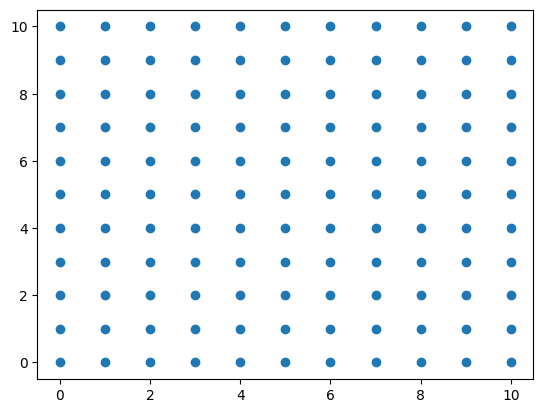

In [33]:
plt.scatter(X,Y)

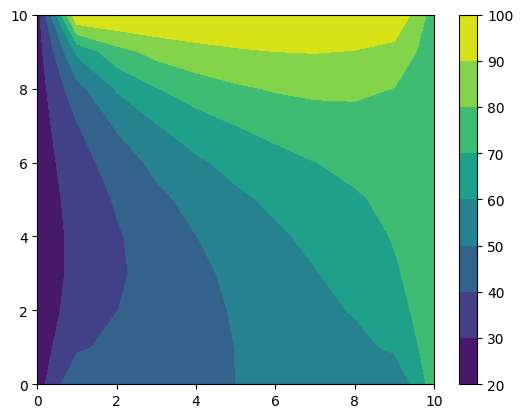

In [34]:
plt.contourf(X,Y,T)
plt.colorbar()

In [35]:
dTdx = np.zeros([y.size,x.size])
dTdy = np.zeros([y.size,x.size])

for i in np.arange(0,x.size):
    if i == 0:
        dTdx[:,i] = (T[:,i+1]-T[:,i])/dx
    elif i == x.size-1:
        dTdx[:,i] = (T[:,i]-T[:,i-1])/dx
    else:
        dTdx[:,i] = (T[:,i+1]-T[:,i-1])/2/dx

for j in np.arange(0,y.size):
    if j == 0:
        dTdy[j,:] = (T[j+1,:]-T[j,:])/dy
    elif j == y.size-1:
        dTdy[j,:] = (T[j,:]-T[j-1,:])/dy
    else:
        dTdy[j,:] = (T[j+1,:]-T[j-1,:])/2/dy


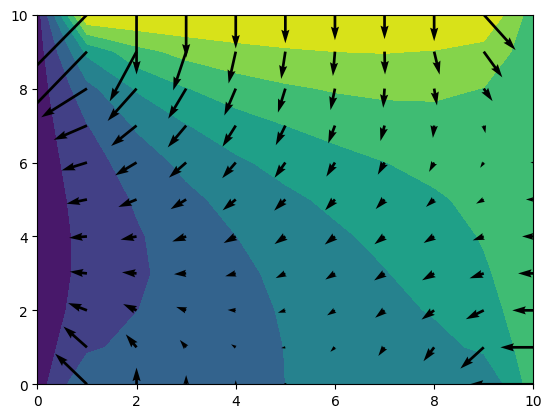

In [36]:
kp = 0.5
qx = -kp*dTdx
qy = -kp*dTdy
plt.contourf(X,Y,T)
plt.quiver(x,y,qx,qy)

In [37]:
T

array([[ 25.        ,  50.        ,  50.        ,  50.        ,
         50.        ,  50.        ,  50.        ,  50.        ,
         50.        ,  50.        ,  75.        ],
       [ 25.        ,  37.97167591,  43.45576041,  46.40274501,
         48.40132299,  50.0636711 ,  51.72112235,  53.70343887,
         56.62072646,  62.06506561,  75.        ],
       [ 25.        ,  33.66635597,  39.81886446,  44.21312118,
         47.63613737,  50.61662876,  53.54308401,  56.80256795,
         60.92621122,  66.72270411,  75.        ],
       [ 25.        ,  32.24531657,  38.507419  ,  43.68884633,
         48.05784545,  51.94251588,  55.6580691 ,  59.51804675,
         63.86011555,  69.00878973,  75.        ],
       [ 25.        ,  32.26725628,  38.97121023,  44.820849  ,
         49.86397288,  54.30260276,  58.37815202,  62.32294133,
         66.34155357,  70.57495025,  75.        ],
       [ 25.        ,  33.35068978,  41.03467181,  47.66005619,
         53.23138209,  57.94194125,  62.0